In [65]:
import time
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, getopt
import dblottery
from query_historical_data import historical_data
from census import census_data
from __future__ import division 

%matplotlib inline

In [66]:
db = dblottery.dblottery()
historical_data=historical_data()
rs=historical_data.get_all_data()
red_matrix_frame = DataFrame(census_data.get_red_matrix(rs))
blue_matrix_frame = DataFrame(census_data.get_blue_matrix(rs))
map_frame = DataFrame(census_data.get_date_id_map(rs))

2003001
2003-02-23
10
2017070
2017-06-18
01


In [67]:
#random_sample = red_matrix_frame.take(np.random.permutation(len(red_matrix_frame))[:3])
#random_sample.T  

In [68]:
#random_sample = blue_matrix_frame.take(np.random.permutation(len(blue_matrix_frame))[:3])
#random_sample.T  

In [69]:
#random_sample = map_frame.take(np.random.permutation(len(map_frame))[:3])
#random_sample.T  

In [70]:
ts= str(time.time())
print ts

1497861121.82


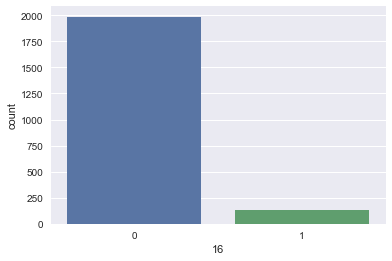

In [71]:
xaxise =[i for i in range (17)]

#sns.set_style('whitegrid')
#sns.pairplot(blue_matrix_frame[1:])
#sns.countplot(x='shot_made_flag', data=data)
sns.countplot(x=16, data=blue_matrix_frame[1:])

In [98]:
df= blue_matrix_frame.loc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]].cumsum()
df[17]=blue_matrix_frame[0]
df['index']=df.index
len(df)

2122

In [99]:
df.tail(5).index.values
df.tail(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,index
2117,133,121,125,121,132,130,135,118,147,129,142,143,135,136,136,135,2017066,2117
2118,133,121,125,122,132,130,135,118,147,129,142,143,135,136,136,135,2017067,2118
2119,133,121,125,122,132,130,135,118,147,129,142,143,135,136,137,135,2017068,2119
2120,133,121,125,122,133,130,135,118,147,129,142,143,135,136,137,135,2017069,2120
2121,133,121,125,122,133,130,135,118,147,129,142,144,135,136,137,135,2017070,2121


In [74]:
#red_matrix_frame = red_matrix_frame.append (census_data.get_sum_info(red_matrix_frame,False))
#df= blue_matrix_frame[[i for i in range (1,17)]].cumsum()

#blue_matrix_frame = blue_matrix_frame.append (census_data.get_sum_info(blue_matrix_frame,True))
#ts= str(time.time())
#print ts
#red_matrix_frame.to_csv(r"./result/redALL"+ts+".csv",index=False)
#blue_matrix_frame.to_csv(r"./result/blueALL"+ts+".csv",index=False)
#map_frame.to_csv(r"./result/mapALL"+ts+".csv",index=False)
#if debug==1:print census_data.get_sum_info(red_matrix_frame,False)
#if debug==1:print census_data.get_sum_info(blue_matrix_frame,True)
#print calc_per(sum(red_matrix_frame[1]),len(rs))
#print red_matrix_frame.tail(3)
#print blue_matrix_frame.tail(3)
#census_data.find_same_rate_scale_blue(blue_matrix_frame)
#print blue_matrix_frame
#print map_frame

#frame =DataFrame(rs)
#print  frame[0][:10]
#frame[0][:10].plot(kind='barh',rot=0)
#print frame.values[0]\
s1= df.loc[1]
s=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#s1.sub(s)
print s1.min(axis=0)

0


In [75]:
length= len(df)
result=[]
maxV=[]
for i in range (length):
    rs = df.loc[i,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]].sub(s)
    if rs.min(axis=0)>0:
        s = df.loc[i]
        result.append(i)
        maxV.append(rs.max(axis=0))

In [76]:
resultLen=[]
length= len(result) 
for i in range (length): 
    if i==0: resultLen.append(result[0]) 
    else: resultLen.append(result[i]-result[i-1])

dfResult=DataFrame(result)
dfResult['max']=maxV 
dfResult['length']=resultLen 
dfResult

,0,max,length
0,104,15.0,104
1,153,5.0,49
2,244,13.0,91
3,318,9.0,74
4,353,5.0,35
5,391,5.0,38
6,474,9.0,83
7,518,6.0,44
8,569,8.0,51
9,605,5.0,36


In [77]:
dfResult[(dfResult['max']>3) & (dfResult['max'] <15)].describe()

,0,max,length
count,38.000000,38.000000,38.000000
mean,1130.973684,6.921053,51.736842
std,576.471489,1.922577,14.472125
min,153.000000,4.000000,31.000000
25%,651.250000,5.000000,41.500000
50%,1096.000000,7.000000,48.500000
75%,1616.750000,8.000000,58.000000
max,2091.000000,13.000000,91.000000


In [92]:
def SumCurrentCol (df):
    return df.loc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]].cumsum()
def GetBlueSumFrame(df,startRow,endRow):
    return SumCurrentCol(df.iloc[startRow:endRow])
dfCurrent =GetBlueSumFrame(blue_matrix_frame,2091,2122)

In [79]:
def countNonShowNum(sumShows):
    length=len(sumShows)
    rs=length
    for i in range (length):
        if sumShows[i] > 0: rs=rs-1
    return rs

TempShow=[0,0,0,0,4,5,6,0,0,0,0,0,0,0,0,0]
print countNonShowNum (TempShow)   

def countAvliableNum(sumShows,maxShowTime):
    length=len(sumShows)
    rs=length
    for i in range (length):
        if sumShows[i] >= maxShowTime: rs=rs-1
    return rs

print countAvliableNum (TempShow,5)

13
14


In [132]:
df3 =GetBlueSumFrame(blue_matrix_frame,1903,1959)
#df3

In [133]:
def CalcProbability (df):
    MaxShow=6    # Max show time in Trust Zone
    TrustNum=55  # define Trust Zone scope
    sumShows=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]  # record summary of show times for each col
    #get summary of current col
    #SumCol= SumCurrentCol(Col)             
    # update record 
    initRate=(1/16)*(1/TrustNum)*100
    initTempR=[initRate for i in range(17)]
    rs=[initTempR]

    dfLength= len(df)
    row=df[0:1]
    print dfLength
    print row
    #remove table head
    for i in range (dfLength): 
        if i<1:
            continue
        else:
            row =df[i-1:i]
        print "row:"
        print row
        sumShows = row.values[0]       
        tempR=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
        print i
        print sumShows
        for j in range(16):
            sumShow = sumShows[j]
            #print sumShow
            if sumShow > MaxShow:
                tempR[j]=0
           # get number of zero in summary record 
            NonShow = countNonShowNum(sumShows)
            #print NonShow
            if (TrustNum - i)> NonShow :
                # get number of col not reached Maxshow times
                avliableNum=countAvliableNum(sumShows,MaxShow)
                #print (1/avliableNum)*((MaxShow-sumShow)/MaxShow)*(1/(TrustNum - i)) #(1/(17-avliableNum))*
                tempR[j]=(1/avliableNum)*((MaxShow-sumShow)/MaxShow)*(1/(TrustNum - i))*100
                #print tempR[j]
            else:
                #print "NonShow"
                if sumShow ==0:
                    tempR[j]=(1/NonShow)*100
                else :
                    tempR[j]=0
            print tempR[j]
        rs.append(tempR)
    return rs

#prodf = DataFrame(CalcProbability(df3))

In [134]:
#len(prodf)
#prodf